# Data Analysis of model performance  
Author: Amish Mishra  
Date: April 5, 2022  
Use `cder1` kernel  

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import random
from IPython.display import display

### Performance using CDER coordinates

In [2]:
# Load in the dataframe
df = pandas.read_csv('perf_dataframes/cder_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
tda_grouped_df= df.groupby('topology').describe()['roc_auc_test']
display(tda_grouped_df)

print('APS stats')
tda_grouped_df= df.groupby('topology').describe()['aps']
display(tda_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.987961,0.003086,0.982833,0.986604,0.987626,0.990116,0.992940
EHEE,10.0,0.896356,0.016021,0.873865,0.884380,0.896329,0.900330,0.921659
HEEH,10.0,0.868576,0.057277,0.798611,0.812500,0.863715,0.913628,0.947917
HHH,10.0,0.801439,0.014197,0.782321,0.788889,0.802033,0.813173,0.820905


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.986866,0.003861,0.980739,0.984378,0.986169,0.989411,0.993740
EHEE,10.0,0.901349,0.023872,0.853326,0.889139,0.905160,0.916840,0.932084
HEEH,10.0,0.830680,0.089472,0.692543,0.758214,0.841678,0.897060,0.952492
HHH,10.0,0.823556,0.019266,0.790022,0.813232,0.825679,0.840829,0.845604


### Performance using SME

In [3]:
# Load in the dataframe
df = pandas.read_csv('perf_dataframes/sme_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
sme_grouped_df= df.groupby('topology').describe()['roc_auc_test']
display(sme_grouped_df)

print('APS stats')
sme_grouped_df= df.groupby('topology').describe()['aps']
display(sme_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996191,0.002405,0.990710,0.995216,0.996730,0.997845,0.998662
EHEE,10.0,0.964955,0.010201,0.952801,0.955301,0.966290,0.968831,0.981564
HEEH,10.0,0.852951,0.051306,0.770833,0.812500,0.859375,0.877604,0.935764
HHH,10.0,0.882319,0.012705,0.861185,0.874362,0.883514,0.892473,0.896379


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996776,0.001877,0.992509,0.996266,0.997214,0.997953,0.998670
EHEE,10.0,0.968058,0.009562,0.954324,0.960104,0.968630,0.973643,0.984590
HEEH,10.0,0.836395,0.062499,0.718615,0.812873,0.829984,0.874347,0.948548
HHH,10.0,0.891944,0.010124,0.877503,0.883142,0.892119,0.898605,0.906022


### Mean Feature Importance for SME-only trained ML models

NameError: name 'save_path' is not defined

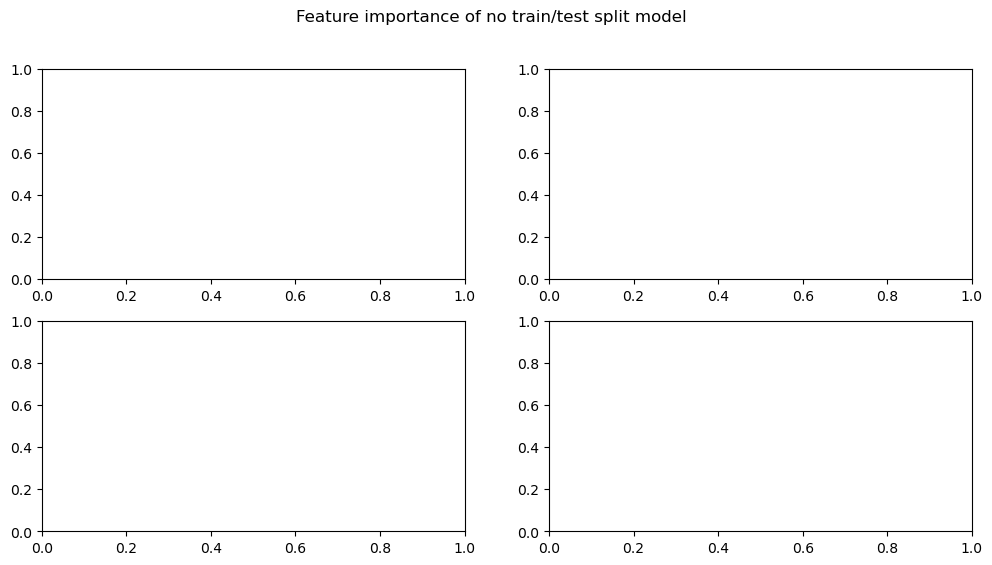

In [4]:
fig, axs = plt.subplots(2,2, figsize=(12,6))
plt.suptitle('Feature importance of no train/test split model')
top_arr = ['HHH', 'EEHEE', 'HEEH', 'EHEE']

for i, top in enumerate(top_arr):
    # Find the mean of the feature importances across all iterations
    features_df = pandas.read_csv(f'{save_path}/{top}_sme_feature_importances_no_train_test_split_df.csv', index_col=0)
    
    # Choose the largest
    largest_importances = features_df.nlargest(n=10, columns=['feature_imp'])

    # Plot
    j = 1 if i > 1 else 0
    i = i%2
    largest_importances.plot.barh(ax=axs[i][j], error_kw={'linewidth': 1, 'capsize': 2, 'capthick': 1})
    axs[i][j].set_title("Feature importances for "+top)
    axs[i][j].set_xlabel("Mean decrease in impurity")
    fig.tight_layout()
    
# fig.savefig('./figures/average_feature_importances.png')

### Performance using SME + CDER Features

In [5]:
# Load in the dataframe
df = pandas.read_csv('perf_dataframes/sme_cder_perf_df_downsample.csv')

print('----Downsample to as many unstable as stable proteins per topology----')

print('ROC-AUC stats')
sme_cder_grouped_df= df.groupby('topology').describe()['roc_auc_test']
display(sme_cder_grouped_df)

print('APS stats')
sme_cder_grouped_df= df.groupby('topology').describe()['aps']
display(sme_cder_grouped_df)

----Downsample to as many unstable as stable proteins per topology----
ROC-AUC stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.996704,0.001783,0.992494,0.996340,0.996600,0.997975,0.998662
EHEE,10.0,0.965368,0.010184,0.952909,0.955909,0.965885,0.970845,0.980590
HEEH,10.0,0.876389,0.060462,0.791667,0.837240,0.865451,0.926215,0.958333
HHH,10.0,0.882313,0.012597,0.861663,0.871778,0.884461,0.892078,0.897053


APS stats


,count,mean,std,min,25%,50%,75%,max
topology,,,,,,,,
EEHEE,10.0,0.997050,0.001677,0.992846,0.996766,0.997348,0.997972,0.998686
EHEE,10.0,0.968383,0.010017,0.955349,0.958676,0.969770,0.975100,0.983731
HEEH,10.0,0.864092,0.075277,0.730272,0.839031,0.853037,0.924877,0.971022
HHH,10.0,0.891604,0.009865,0.876392,0.884261,0.892972,0.896914,0.907493


### Compare model performances

In [6]:
summarized_df = pandas.concat([sme_grouped_df['50%'], tda_grouped_df['50%'], sme_cder_grouped_df['50%']], axis = 1)
summarized_df.columns = ['Median APS for SME based classifier', 'Median APS for CDER based classifier', 'Median APS for SME+CDER based classifier']
print('Performance of training on all stable and same number of unstable proteins for each topology')
summarized_df

Performance of training on all stable and same number of unstable proteins for each topology


,Median APS for SME based classifier,Median APS for CDER based classifier,Median APS for SME+CDER based classifier
topology,,,
EEHEE,0.997214,0.986169,0.997348
EHEE,0.968630,0.905160,0.969770
HEEH,0.829984,0.841678,0.853037
HHH,0.892119,0.825679,0.892972
